In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor

In [2]:
vertebral_data = pd.read_csv('vertebral_column_data/column_3C.dat', header=None, sep=" ").values
data, label = vertebral_data[:, :-1], vertebral_data[:, -1]

or_data = vertebral_data[:, :-1]
print("Original (data, label): ", data.shape, label.shape)

Original (data, label):  (310, 6) (310,)


### Remove Outlier

In [3]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(data)

mask = yhat != -1

removed_outlier = []
for i, v in enumerate(mask):
    if not v:
        removed_outlier.append(i)
print("Removed Outlier index: ", removed_outlier)

data, label = data[mask, :], label[mask]
print("Left (data, label): ", data.shape, label.shape)

Removed Outlier index:  [9, 26, 51, 75, 85, 95, 115, 162, 167, 180, 197, 224]
Left (data, label):  (298, 6) (298,)


### Normalization

In [4]:
min_max_scalar = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled = min_max_scalar.fit_transform(data)

### Plot Stack Bar Chart

In [5]:
def rotated(array_2d):
    list_of_tuples = zip(*array_2d[::-1])
    return [list(elem) for elem in list_of_tuples]

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=True, reverse=False):

    ny = len(data[0])
    ind = list(range(ny))
    print(ny)

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

In [13]:
data

array([[63.03, 22.55, 39.61, 40.48, 98.67, -0.25],
       [39.06, 10.06, 25.02, 29.0, 114.41, 4.56],
       [68.83, 22.22, 50.09, 46.61, 105.99, -3.53],
       ...,
       [61.45, 22.69, 46.17, 38.75, 125.67, -2.71],
       [45.25, 8.69, 41.58, 36.56, 118.55, 0.21],
       [33.84, 5.07, 36.64, 28.77, 123.95, -0.2]], dtype=object)

[[0.38335082 0.51982851 0.28284843 0.41439927 0.27004393 0.07946192]
 [0.10388248 0.29671311 0.11168466 0.23891776 0.48613399 0.11481917]
 [0.45097353 0.51393355 0.4057954  0.5081015  0.37053817 0.05535137]
 ...
 [0.36492946 0.5223294  0.3598076  0.38795475 0.64071938 0.06137901]
 [0.17605223 0.27224009 0.30595964 0.35447875 0.5429709  0.08284328]
 [0.04302204 0.20757413 0.24800563 0.23540202 0.61710599 0.07982946]]
310


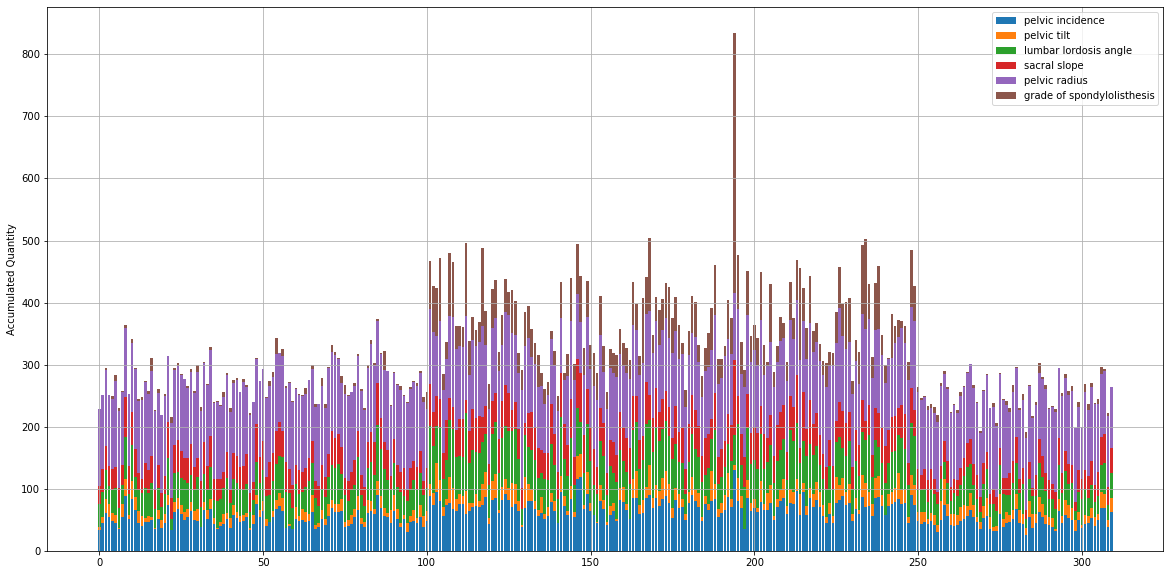

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

series_labels =["pelvic incidence","pelvic tilt","lumbar lordosis angle", "sacral slope", "pelvic radius", "grade of spondylolisthesis"]

print(x_scaled)
rotated_data = [rotated(x_scaled), rotated(data), rotated(or_data)]
name = ['normalized', 'removed_outlier', 'orignal']

# for i, v in enumerate(rotated_data):
plot_stacked_bar(
    rotated(or_data),
    series_labels,
    value_format="{:.1f}",
    y_label="Accumulated Quantity"
)
plt.savefig(f'output/bar_{name[2]}.png')
plt.show()

## Linkage Comparison
> compare single link/ complete link/ groupa average for the first question
### Single Link

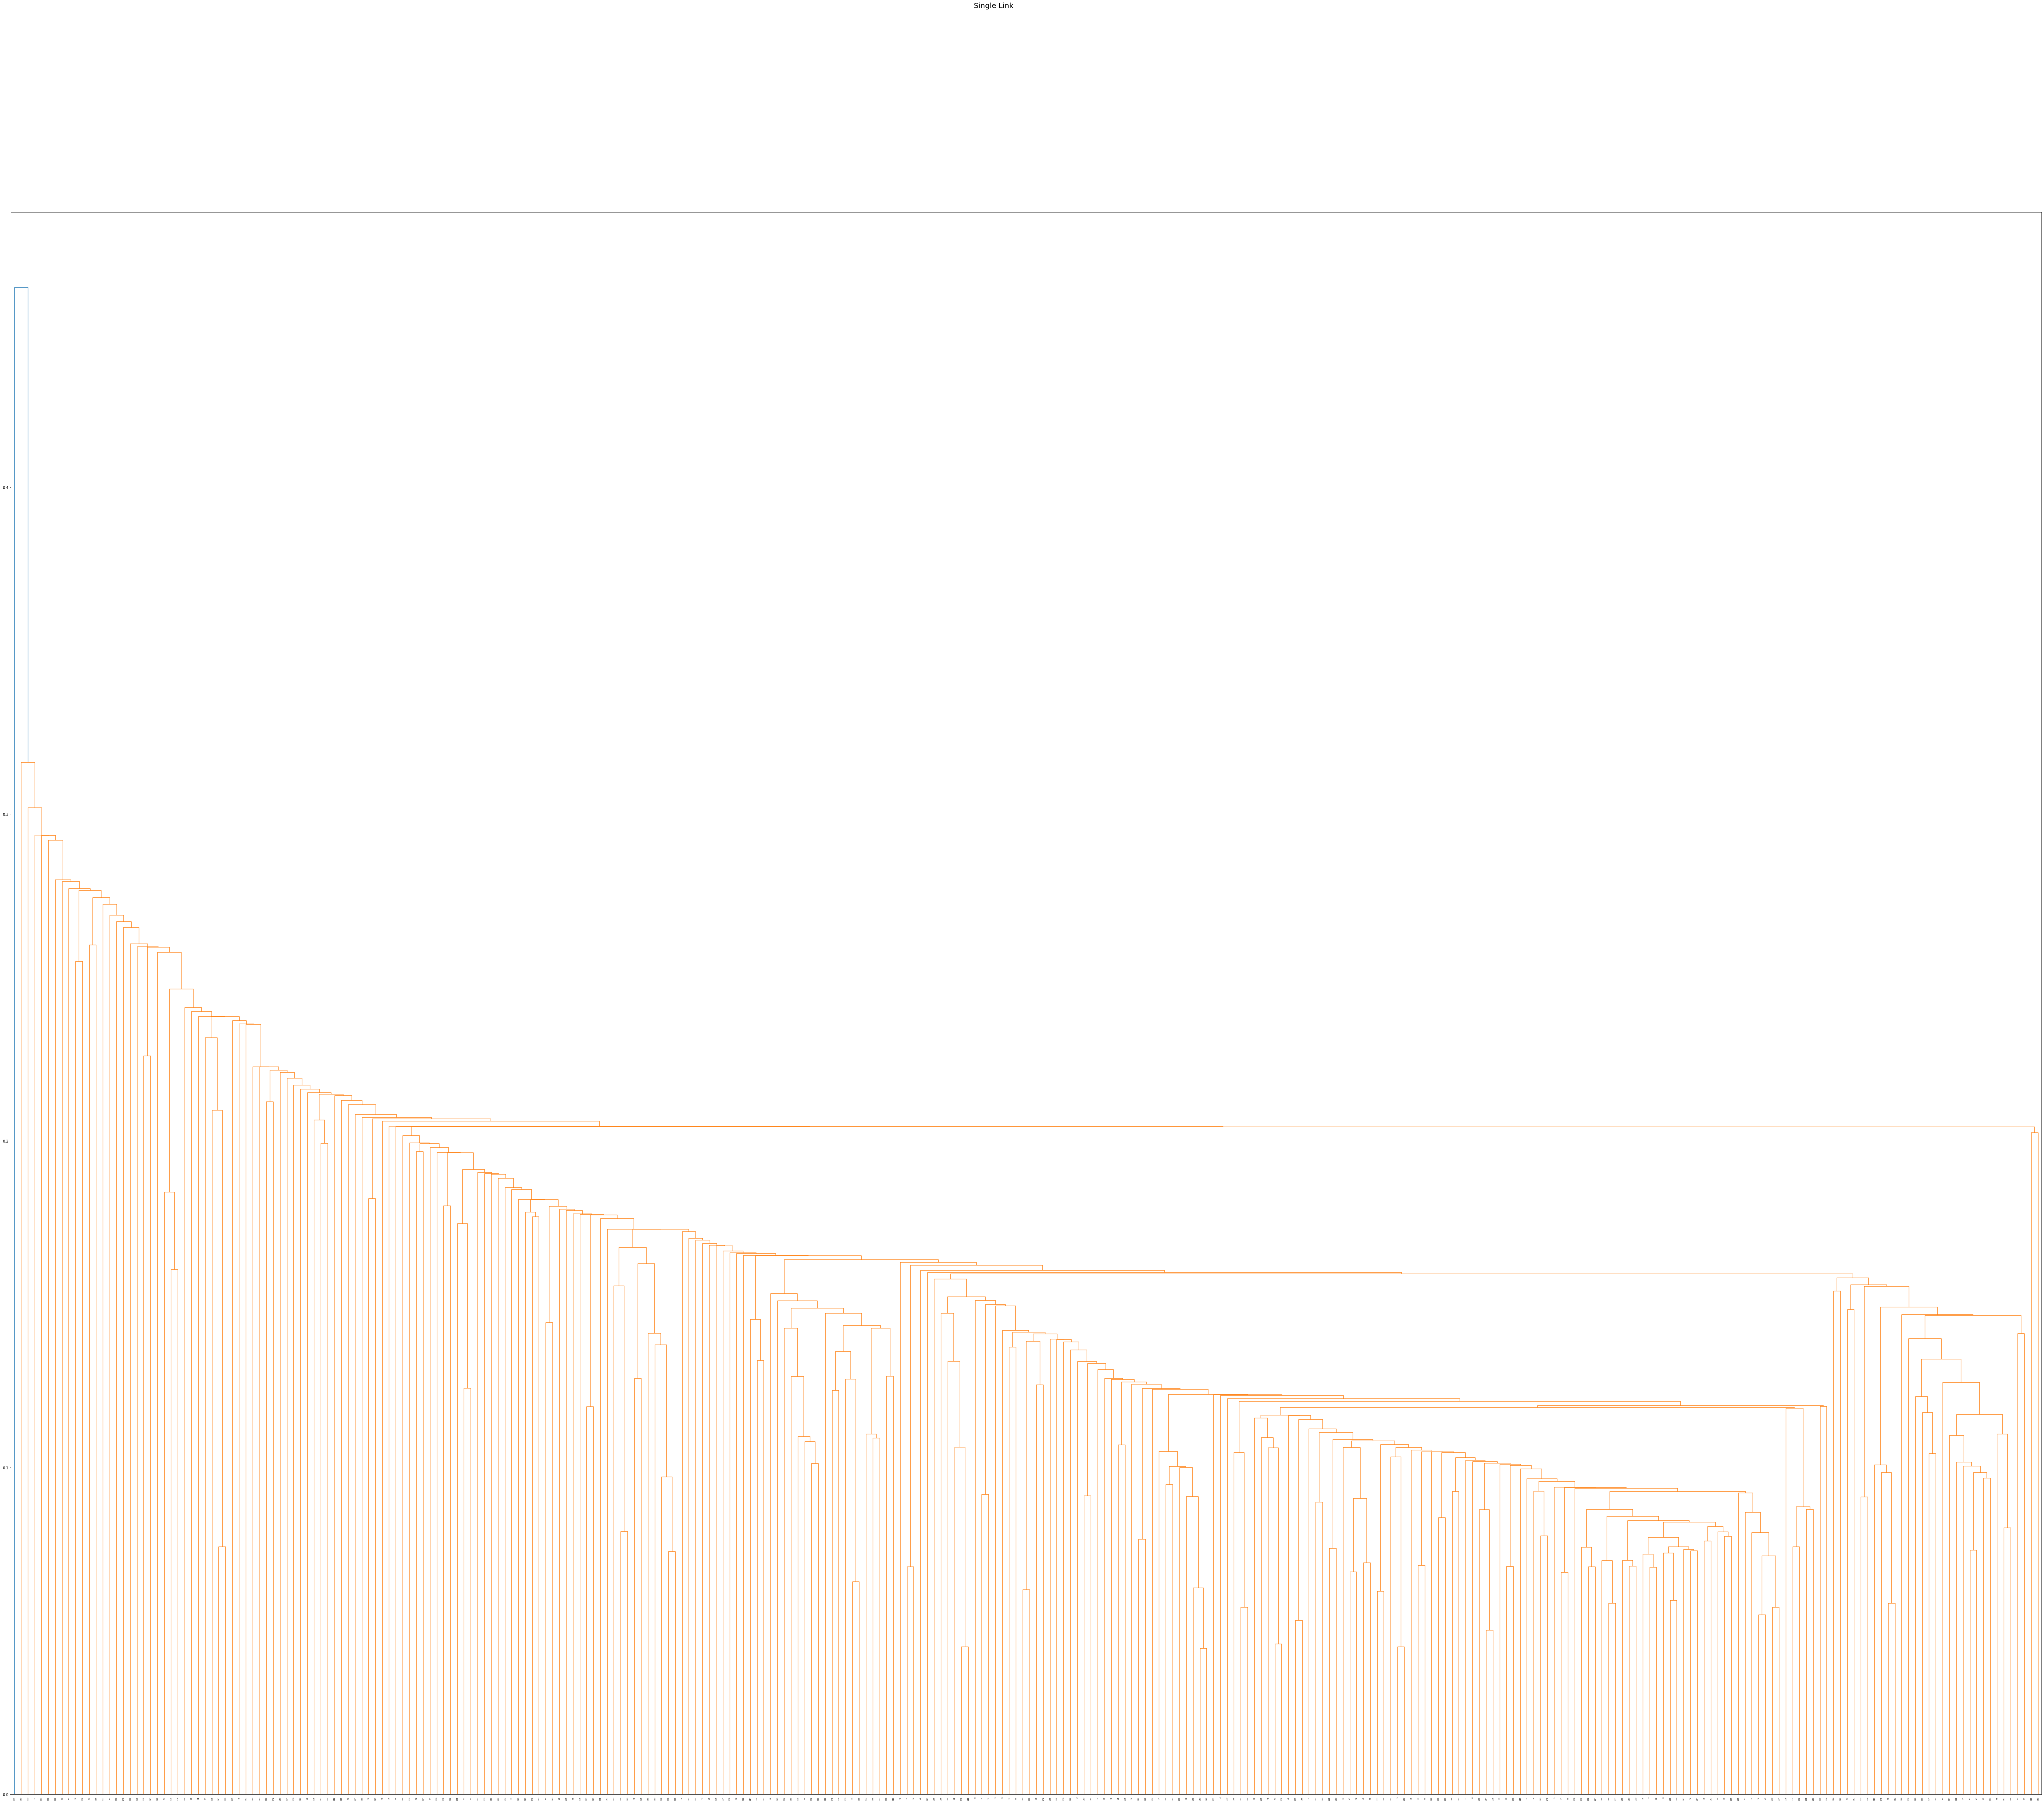

In [17]:
singleLink = linkage(x_scaled, 'single')
fig = plt.figure(figsize=(100, 80))
fig.suptitle('Single Link', fontsize=20)
plt.xticks( fontsize=20)
dn = dendrogram(singleLink)
plt.savefig('output/single_link.png')

### Complete Link

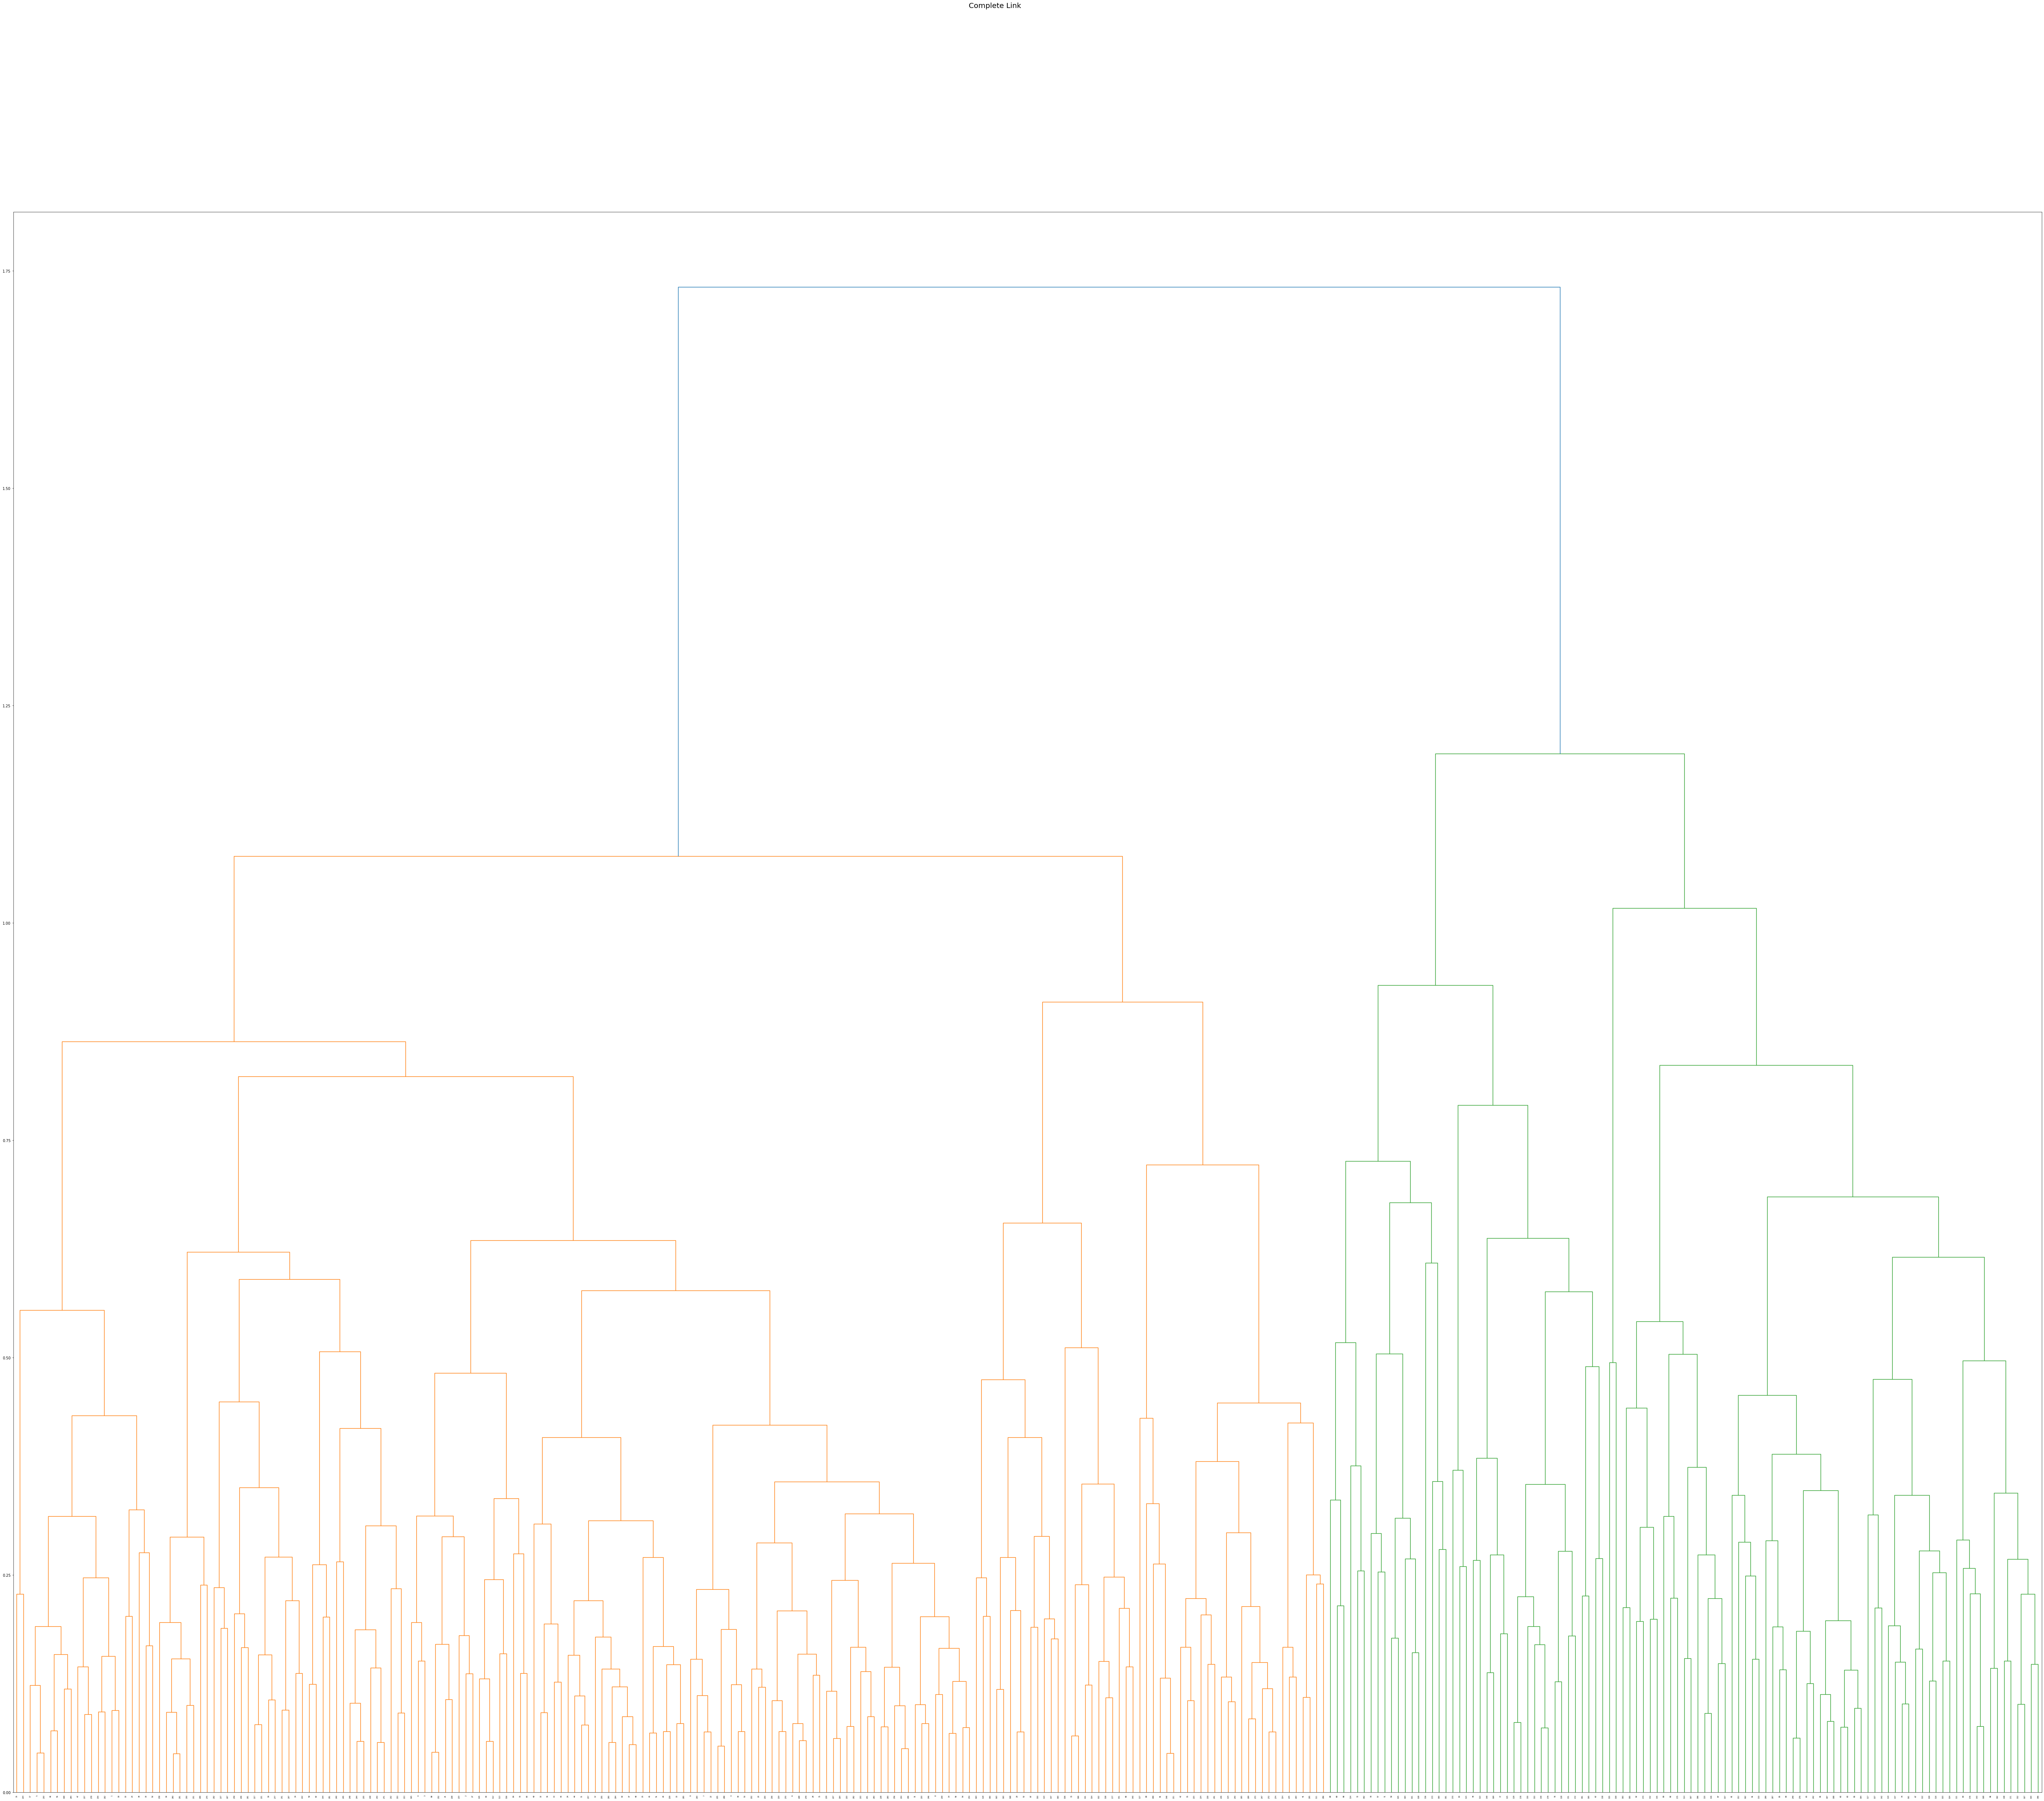

In [18]:
completeLink = linkage(x_scaled, 'complete')

fig = plt.figure(figsize=(100, 80))
fig.suptitle('Complete Link', fontsize=20)
plt.xticks( fontsize=20)
dn = dendrogram(completeLink)
plt.savefig('output/complete_link.png')

### Group Average Link

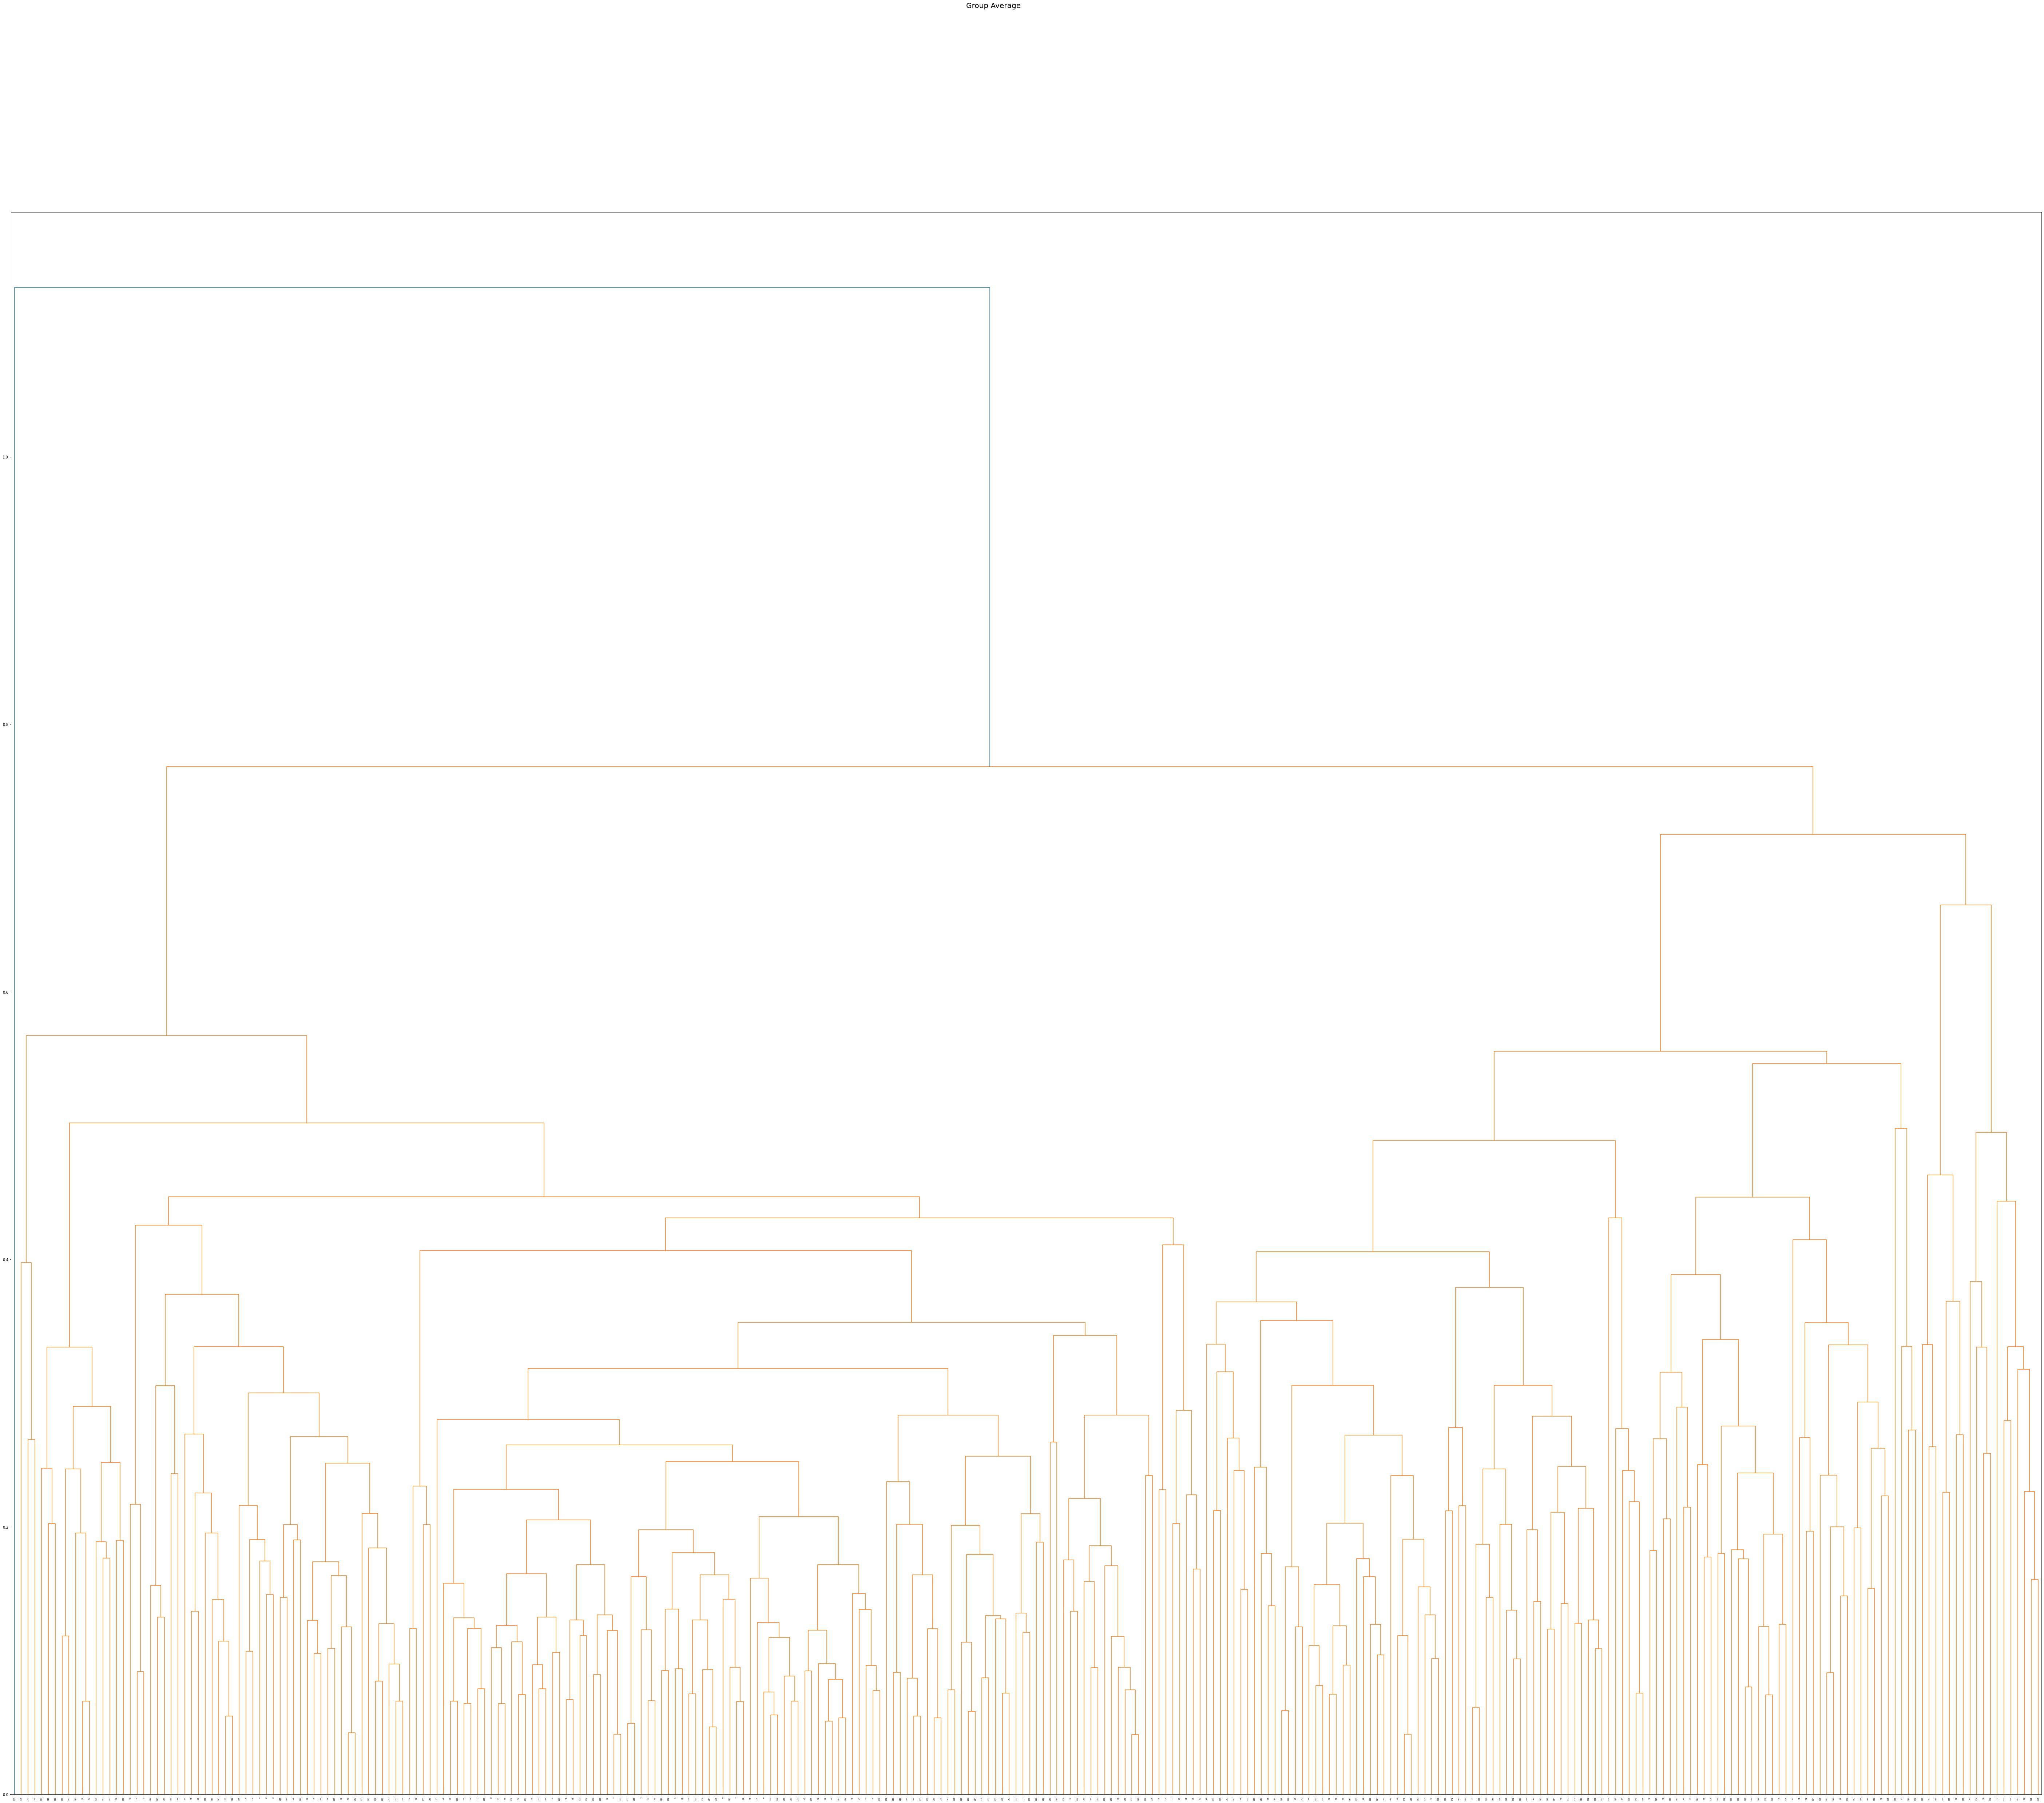

In [19]:
averageLink = linkage(x_scaled, 'average')

fig = plt.figure(figsize=(100, 80))
fig.suptitle('Group Average', fontsize=20)
plt.xticks(fontsize=20)
dn = dendrogram(averageLink)
plt.savefig('output/average_link.png')
plt.show()